In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
season_team = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_teams.csv')
qualifying_race = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_qualifyingResults.csv')
driver_data = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_drivers.csv')
driver_of_the_day = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_driverOfTheDayVotes.csv')
season_calendar = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_calendar.csv')
race_result = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_raceResults.csv')

In [3]:
print(season_team.head())
print(qualifying_race.head())
print(driver_data.head())
print(driver_of_the_day.head())
print(season_calendar.head())
print(race_result.head())


              Team                         Full Team Name  \
0  Red Bull Racing                 Oracle Red Bull Racing   
1         Mercedes          Mercedes-AMG Petronas F1 Team   
2          Ferrari                       Scuderia Ferrari   
3          McLaren                 McLaren Formula 1 Team   
4     Aston Martin  Aston Martin Aramco Cognizant F1 Team   

                            Base        Team Chief  \
0  Milton Keynes, United Kingdom  Christain Horner   
1       Brackley, United Kingdom        Toto Wolff   
2               Maranello, Italy  Frédéric Vasseur   
3         Woking, United Kingdom     Andrea Stella   
4    Silverstone, United Kingdom        Mike Krack   

                     Technical Chief Chassis  Power Unit  First Team Entry  \
0                       Pierre Waché    RB19  Honda RBPT              1997   
1                      James Allison     W14    Mercedes              1970   
2  Enrico Cardile / Enrico Gualtieri   SF-23     Ferrari              1950

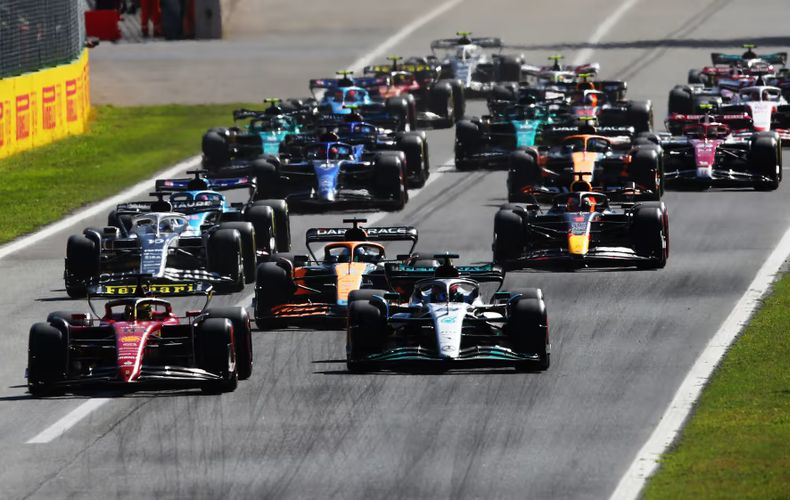FORMULA 1

In [4]:
print(season_team.describe(include='all'))
print(qualifying_race.describe(include='all'))
print(driver_data.describe(include='all'))
print(driver_of_the_day.describe(include='all'))
print(season_calendar.describe(include='all'))
print(race_result.describe(include='all'))


                   Team          Full Team Name  \
count                10                      10   
unique               10                      10   
top     Red Bull Racing  Oracle Red Bull Racing   
freq                  1                       1   
mean                NaN                     NaN   
std                 NaN                     NaN   
min                 NaN                     NaN   
25%                 NaN                     NaN   
50%                 NaN                     NaN   
75%                 NaN                     NaN   
max                 NaN                     NaN   

                                 Base        Team Chief Technical Chief  \
count                              10                10              10   
unique                             10                10              10   
top     Milton Keynes, United Kingdom  Christain Horner    Pierre Waché   
freq                                1                 1               1   
mean        

In [5]:
print(season_team.dtypes)
print(qualifying_race.dtypes)
print(driver_data.dtypes)
print(driver_of_the_day.dtypes)
print(season_calendar.dtypes)
print(race_result.dtypes)


Team                   object
Full Team Name         object
Base                   object
Team Chief             object
Technical Chief        object
Chassis                object
Power Unit             object
First Team Entry        int64
World Championships     int64
Highest Race Finish    object
Pole Positions          int64
Fastest Laps            int64
dtype: object
Track       object
Position    object
No           int64
Driver      object
Team        object
Q1          object
Q2          object
Q3          object
Laps         int64
dtype: object
Driver                    object
Abbreviation              object
No                         int64
Team                      object
Country                   object
Podiums                    int64
Points                   float64
Grands Prix Entered        int64
World Championships        int64
Highest Race Finish       object
Highest Grid Position      int64
Date of Birth             object
Place of Birth            object
dtype: objec

In [6]:
print(season_team.isnull().sum())
print(qualifying_race.isnull().sum())
print(driver_data.isnull().sum())
print(driver_of_the_day.isnull().sum())
print(season_calendar.isnull().sum())
print(race_result.isnull().sum())


Team                   0
Full Team Name         0
Base                   0
Team Chief             0
Technical Chief        0
Chassis                0
Power Unit             0
First Team Entry       0
World Championships    0
Highest Race Finish    0
Pole Positions         0
Fastest Laps           0
dtype: int64
Track         0
Position      0
No            0
Driver        0
Team          0
Q1            0
Q2          111
Q3          220
Laps          0
dtype: int64
Driver                   0
Abbreviation             0
No                       0
Team                     0
Country                  0
Podiums                  0
Points                   0
Grands Prix Entered      0
World Championships      0
Highest Race Finish      0
Highest Grid Position    0
Date of Birth            0
Place of Birth           0
dtype: int64
Track           0
1st Place       0
1st Place(%)    0
2nd Place       0
2nd Place(%)    0
3rd Place       0
3rd Place(%)    0
4th Place       0
4th Place(%)    0
5th 

In [13]:
qualifying_race['Q2_DNS'] = qualifying_race['Q2'].isnull().astype(int)  # 1 if Q2 is NaN
qualifying_race['Q3_DNS'] = qualifying_race['Q3'].isnull().astype(int)  # 1 if Q3 is NaN

# Optionally, fill missing values in Q2 and Q3 with a placeholder (e.g., "DNS")
qualifying_race['Q2'].fillna('DNS', inplace=True)
qualifying_race['Q3'].fillna('DNS', inplace=True)

# To check the updated DataFrame
print(qualifying_race[['Track', 'Driver', 'Q2', 'Q2_DNS', 'Q3', 'Q3_DNS']])




         Track           Driver        Q2  Q2_DNS        Q3  Q3_DNS
0      Bahrain   Max Verstappen  1:30.503       0  1:29.708       0
1      Bahrain     Sergio Perez  1:30.746       0  1:29.846       0
2      Bahrain  Charles Leclerc  1:30.282       0  1:30.000       0
3      Bahrain     Carlos Sainz  1:30.515       0  1:30.154       0
4      Bahrain  Fernando Alonso  1:30.645       0  1:30.336       0
..         ...              ...       ...     ...       ...     ...
435  Abu Dhabi     Carlos Sainz       DNS       1       DNS       1
436  Abu Dhabi  Kevin Magnussen       DNS       1       DNS       1
437  Abu Dhabi  Valtteri Bottas       DNS       1       DNS       1
438  Abu Dhabi      Guanyu Zhou       DNS       1       DNS       1
439  Abu Dhabi   Logan Sargeant       DNS       1       DNS       1

[440 rows x 6 columns]


In [19]:
# Summary statistics for numerical variables

print(driver_data[['Podiums', 'Points', 'Grands Prix Entered']].describe())
# Confirm changes
print(qualifying_race[['Track', 'Driver', 'Q2', 'Q2_DNS', 'Q3', 'Q3_DNS']].head(10))



          Podiums       Points  Grands Prix Entered
count   22.000000    22.000000            22.000000
mean    28.272727   884.295455           143.681818
std     48.969555  1130.695926           101.760403
min      0.000000     1.000000             5.000000
25%      0.250000   119.250000            69.750000
50%      3.500000   445.500000           131.500000
75%     31.500000  1256.250000           200.750000
max    197.000000  4639.500000           380.000000
     Track           Driver        Q2  Q2_DNS        Q3  Q3_DNS
0  Bahrain   Max Verstappen  1:30.503       0  1:29.708       0
1  Bahrain     Sergio Perez  1:30.746       0  1:29.846       0
2  Bahrain  Charles Leclerc  1:30.282       0  1:30.000       0
3  Bahrain     Carlos Sainz  1:30.515       0  1:30.154       0
4  Bahrain  Fernando Alonso  1:30.645       0  1:30.336       0
5  Bahrain   George Russell  1:30.507       0  1:30.340       0
6  Bahrain   Lewis Hamilton  1:30.513       0  1:30.384       0
7  Bahrain     Lance

Number of teams: 10
Team Full Names and Constructors:
               Team                         Full Team Name  \
0  Red Bull Racing                 Oracle Red Bull Racing   
1         Mercedes          Mercedes-AMG Petronas F1 Team   
2          Ferrari                       Scuderia Ferrari   
3          McLaren                 McLaren Formula 1 Team   
4     Aston Martin  Aston Martin Aramco Cognizant F1 Team   
5           Alpine                     BWT Alpine F1 Team   
6         Williams                        Williams Racing   
7       AlphaTauri                    Scuderia AlphaTauri   
8       Alfa Romeo               Alfa Romeo F1 Team Stake   
9     Haas F1 Team                 MoneyGram Haas F1 Team   

                Team Chief                    Technical Chief  
0         Christain Horner                       Pierre Waché  
1               Toto Wolff                      James Allison  
2         Frédéric Vasseur  Enrico Cardile / Enrico Gualtieri  
3            Andr

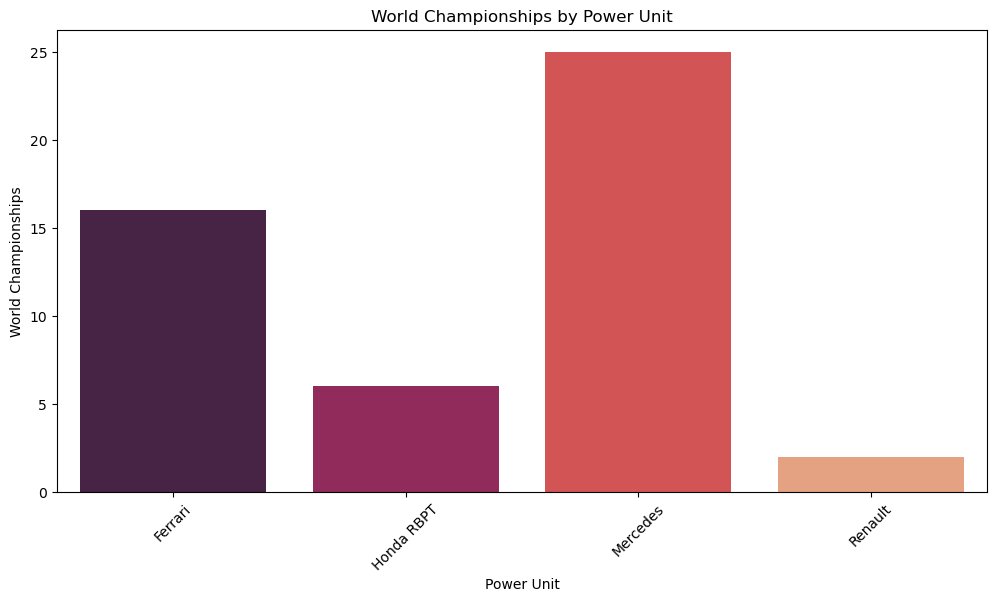

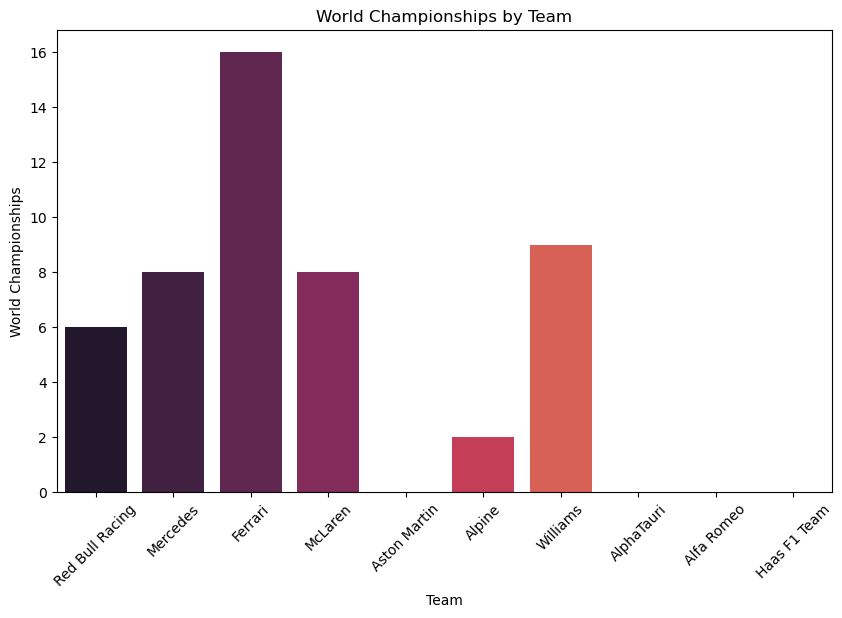

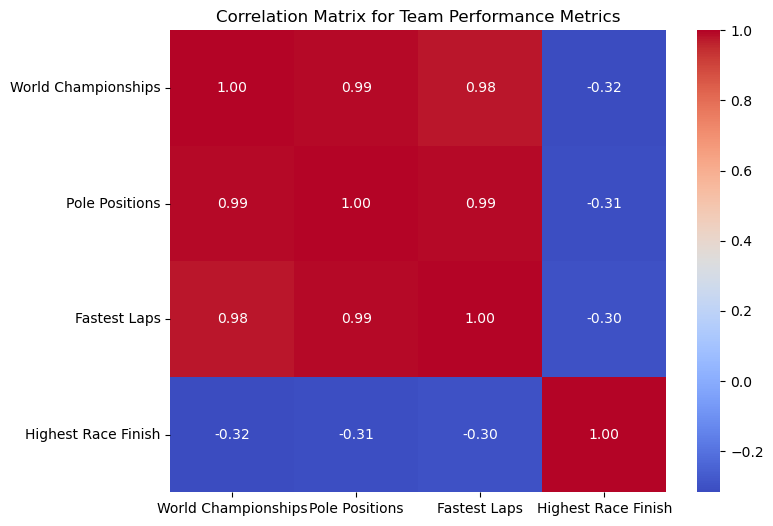

In [43]:
num_teams = season_team['Team'].nunique()
print("Number of teams:", num_teams)

# Display Full Team Names and Constructors
print("Team Full Names and Constructors:\n", season_team[['Team', 'Full Team Name', 'Team Chief', 'Technical Chief']])

# 2. Power Unit Success Analysis
plt.figure(figsize=(12, 6))
power_unit_success = season_team.groupby('Power Unit').agg({
    'World Championships': 'sum', 
    'Highest Race Finish': 'mean', 
    'Fastest Laps': 'sum'
}).reset_index()

sns.barplot(data=power_unit_success, x='Power Unit', y='World Championships', palette='rocket')
plt.title('World Championships by Power Unit')
plt.xlabel('Power Unit')
plt.ylabel('World Championships')
plt.xticks(rotation=45)
plt.show()

# 3. World Championships by Team
plt.figure(figsize=(10, 6))
sns.barplot(data=season_team, x='Team', y='World Championships', palette='rocket')
plt.title('World Championships by Team')
plt.xlabel('Team')
plt.ylabel('World Championships')
plt.xticks(rotation=45)
plt.show()

# 4. Correlation Analysis
correlation_matrix = season_team[['World Championships', 'Pole Positions', 'Fastest Laps', 'Highest Race Finish']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix for Team Performance Metrics')
plt.show()

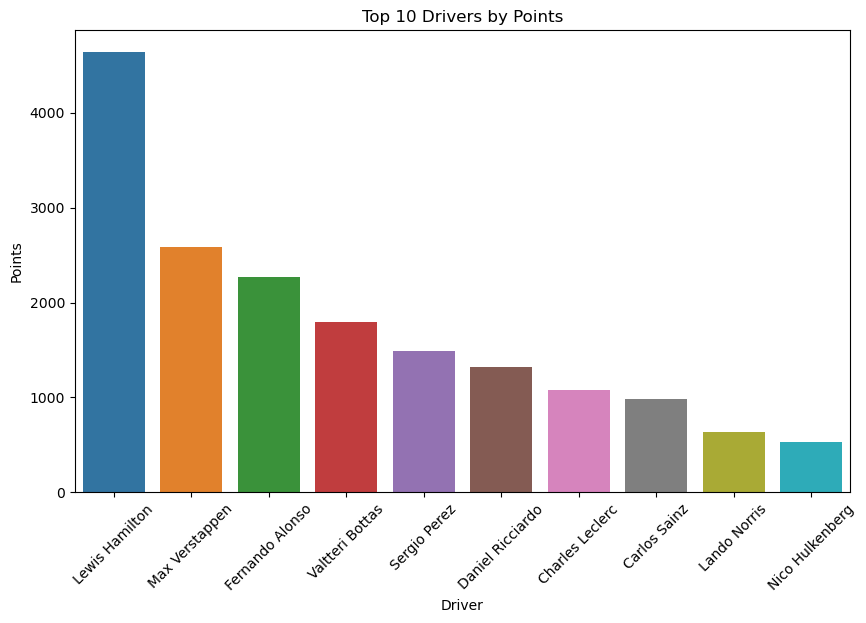

In [45]:
top_drivers = driver_data.nlargest(10, 'Points')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_drivers, x='Driver', y='Points')
plt.title('Top 10 Drivers by Points')
plt.xticks(rotation=45)
plt.show()



Lewis Hamilton is a British racing driver widely regarded as one of the greatest in Formula 1 history. Born on January 7, 1985, in Stevenage, Hertfordshire, he began karting at a young age and quickly progressed through the ranks of motorsport. Hamilton made his F1 debut with McLaren in 2007, impressively finishing third in his first race and securing his first pole position shortly after.

In 2008, he won his first World Championship, becoming the youngest champion at the time. After a successful stint with McLaren, he joined Mercedes in 2013, where he truly cemented his legacy. Hamilton has since claimed multiple championships, breaking numerous records, including the most career wins, pole positions, and podium finishes.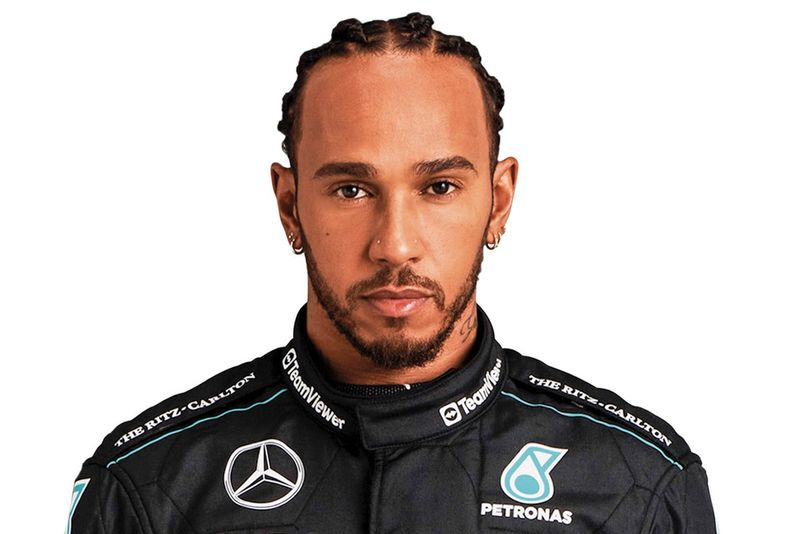

In [66]:
race_wins = race_result[race_result['Position'] == 1]

# Count the number of wins for each driver
wins_count = race_wins['Driver'].value_counts().reset_index()
wins_count.columns = ['Driver', 'Race Wins']

# Display the result
print(wins_count)

Empty DataFrame
Columns: [Driver, Race Wins]
Index: []


In [67]:
print("Race Result DataFrame:")
print(race_result.head())

Race Result DataFrame:
     Track Position  No           Driver                          Team  \
0  Bahrain        1   1   Max Verstappen    Red Bull Racing Honda RBPT   
1  Bahrain        2  11     Sergio Perez    Red Bull Racing Honda RBPT   
2  Bahrain        3  14  Fernando Alonso  Aston Martin Aramco Mercedes   
3  Bahrain        4  55     Carlos Sainz                       Ferrari   
4  Bahrain        5  44   Lewis Hamilton                      Mercedes   

   Starting Grid  Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
0              1    57  1:33:56.736      25              No         1:36.236  
1              2    57      +11.987      18              No         1:36.344  
2              5    57      +38.637      15              No         1:36.156  
3              4    57      +48.052      12              No         1:37.130  
4              7    57      +50.977      10              No         1:36.546  


In [71]:
race_wins = race_result['Position'] == 1
print(race_wins)


Race Result DataFrame:
     Track Position  No           Driver                          Team  \
0  Bahrain        1   1   Max Verstappen    Red Bull Racing Honda RBPT   
1  Bahrain        2  11     Sergio Perez    Red Bull Racing Honda RBPT   
2  Bahrain        3  14  Fernando Alonso  Aston Martin Aramco Mercedes   
3  Bahrain        4  55     Carlos Sainz                       Ferrari   
4  Bahrain        5  44   Lewis Hamilton                      Mercedes   

   Starting Grid  Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
0              1    57  1:33:56.736      25              No         1:36.236  
1              2    57      +11.987      18              No         1:36.344  
2              5    57      +38.637      15              No         1:36.156  
3              4    57      +48.052      12              No         1:37.130  
4              7    57      +50.977      10              No         1:36.546  

Boolean Series for Race Wins:
0      False
1      False
2

In [74]:
print(race_result['Position'].unique())


['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' 'NC' '18' '19' '20' 'DQ']


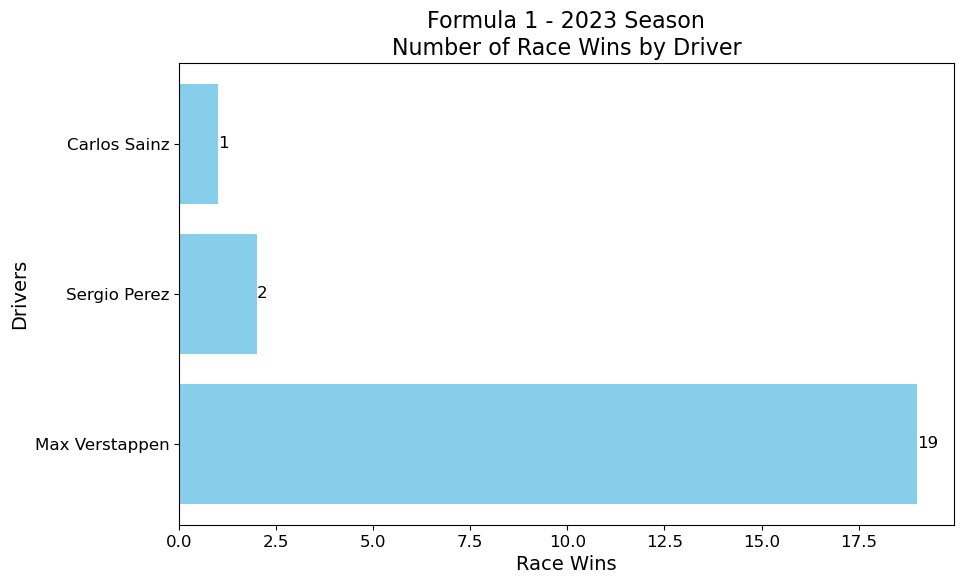

In [125]:

if not winners.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(winners.index, winners, color='skyblue')
    plt.xlabel('Race Wins', fontsize=14)
    plt.ylabel('Drivers', fontsize=14)
    plt.title('Formula 1 - 2023 Season\nNumber of Race Wins by Driver', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate the bars with the win counts
    for index, value in enumerate(winners):
        plt.text(value, index, str(value), fontsize=12, va='center')

    # Show the plot
    plt.show()
else:
    print("No race wins found.")

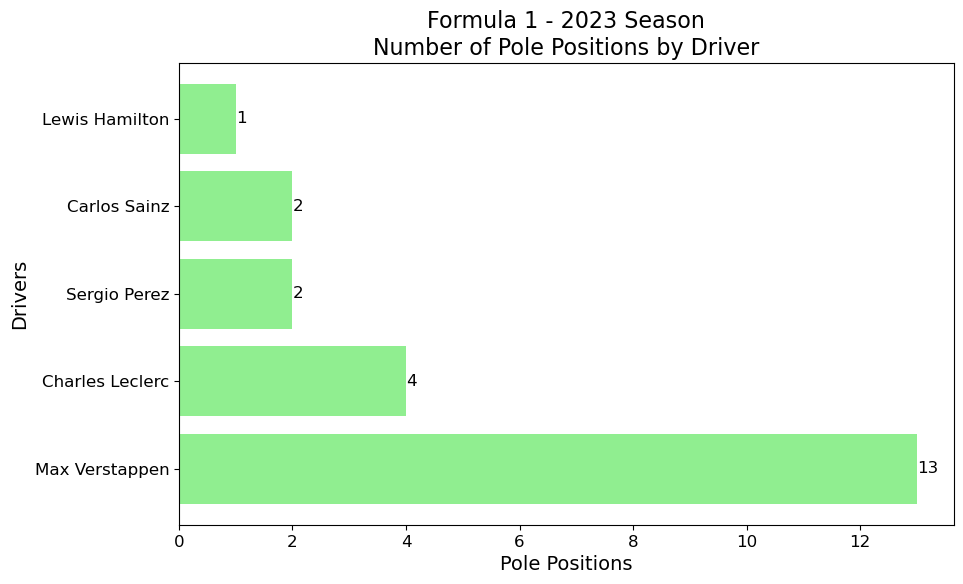

In [82]:
qualifying_results['Position'] = pd.to_numeric(qualifying_results['Position'], errors='coerce')



# Create the plot only if there are pole positions
if not pole_positions.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(pole_positions.index, pole_positions, color='lightgreen')
    plt.xlabel('Pole Positions', fontsize=14)
    plt.ylabel('Drivers', fontsize=14)
    plt.title('Formula 1 - 2023 Season\nNumber of Pole Positions by Driver', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate the bars with the pole position counts
    for index, value in enumerate(pole_positions):
        plt.text(value, index, str(value), fontsize=12, va='center')

    # Show the plot
    plt.show()
else:
    print("No pole positions found.")

MAX VERSTAPPEN!

In 2023, Max Verstappen showcased remarkable dominance in Formula 1, driving for Red Bull Racing. His season was marked by a series of impressive performances, including multiple race wins and consistent podium finishes. Verstappen's skillful driving and the strong performance of the Red Bull car allowed him to establish an early lead in the championship standings.

Key to his success was the team's strategic acumen and a well-balanced car that excelled in various conditions. Verstappen's ability to maintain tire performance and manage race pace set him apart from his competitors. He also exhibited resilience and composure, often navigating challenging race situations with ease.

As the season progressed, Verstappen’s confidence grew, culminating in a series of victories that solidified his position as the frontrunner. By mid-season, he was well on his way to securing his third consecutive World Championship, further cementing his status as one of the sport's elite drivers. His dominance not only highlighted his individual talent but also showcased Red Bull's engineering prowess, making the 2023 season one of the most memorable in recent F1 history.

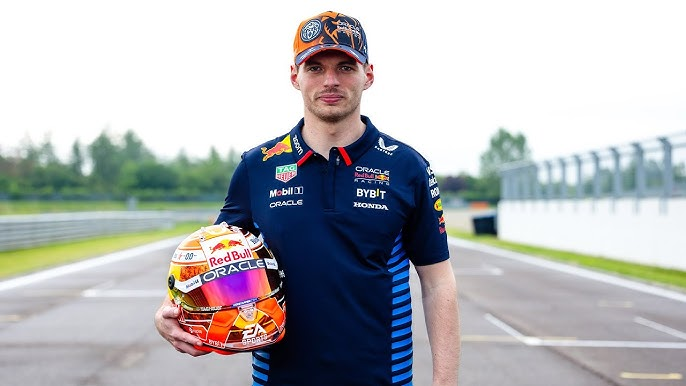

First few rows of the race results:
     Track Position  No           Driver                          Team  \
0  Bahrain        1   1   Max Verstappen    Red Bull Racing Honda RBPT   
1  Bahrain        2  11     Sergio Perez    Red Bull Racing Honda RBPT   
2  Bahrain        3  14  Fernando Alonso  Aston Martin Aramco Mercedes   
3  Bahrain        4  55     Carlos Sainz                       Ferrari   
4  Bahrain        5  44   Lewis Hamilton                      Mercedes   

   Starting Grid  Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
0              1    57  1:33:56.736      25              No         1:36.236  
1              2    57      +11.987      18              No         1:36.344  
2              5    57      +38.637      15              No         1:36.156  
3              4    57      +48.052      12              No         1:37.130  
4              7    57      +50.977      10              No         1:36.546  


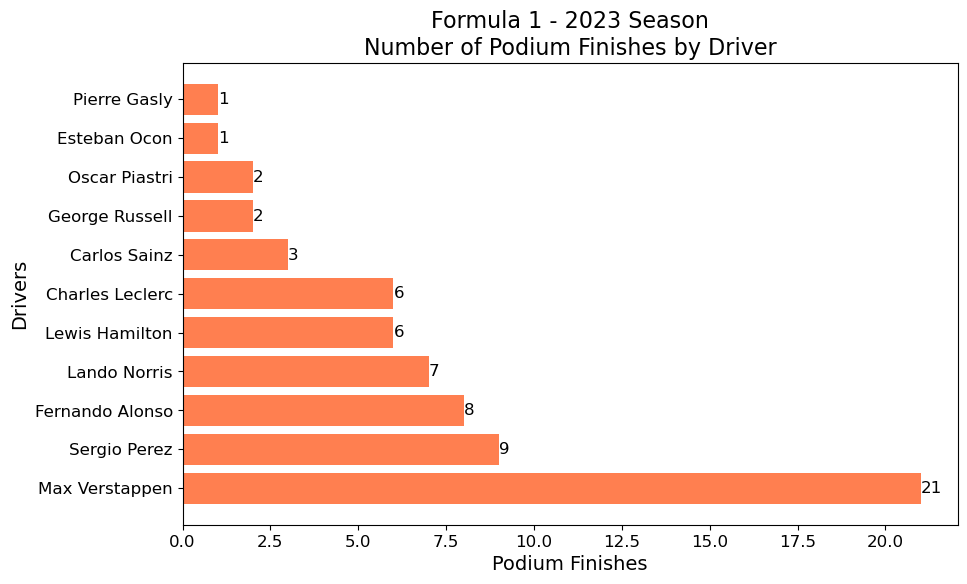

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the race result data for the 2023 season
race_result = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_raceResults.csv')

# Check the first few rows of the race results
print("First few rows of the race results:")
print(race_result.head())

# Convert the Position column to numeric, coercing errors to NaN
race_result['Position'] = pd.to_numeric(race_result['Position'], errors='coerce')

# Filter for podium finishes (where Position is 1, 2, or 3) and count
podium_finishers = race_result[race_result['Position'].isin([1, 2, 3])]['Driver'].value_counts()

# Create the plot only if there are podium finishes
if not podium_finishers.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(podium_finishers.index, podium_finishers, color='coral')
    plt.xlabel('Podium Finishes', fontsize=14)
    plt.ylabel('Drivers', fontsize=14)
    plt.title('Formula 1 - 2023 Season\nNumber of Podium Finishes by Driver', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate the bars with the podium counts
    for index, value in enumerate(podium_finishers):
        plt.text(value, index, str(value), fontsize=12, va='center')

    # Show the plot
    plt.show()
else:
    print("No podium finishes found.")


First few rows of the race results:
     Track Position  No           Driver                          Team  \
0  Bahrain        1   1   Max Verstappen    Red Bull Racing Honda RBPT   
1  Bahrain        2  11     Sergio Perez    Red Bull Racing Honda RBPT   
2  Bahrain        3  14  Fernando Alonso  Aston Martin Aramco Mercedes   
3  Bahrain        4  55     Carlos Sainz                       Ferrari   
4  Bahrain        5  44   Lewis Hamilton                      Mercedes   

   Starting Grid  Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
0              1    57  1:33:56.736      25              No         1:36.236  
1              2    57      +11.987      18              No         1:36.344  
2              5    57      +38.637      15              No         1:36.156  
3              4    57      +48.052      12              No         1:37.130  
4              7    57      +50.977      10              No         1:36.546  


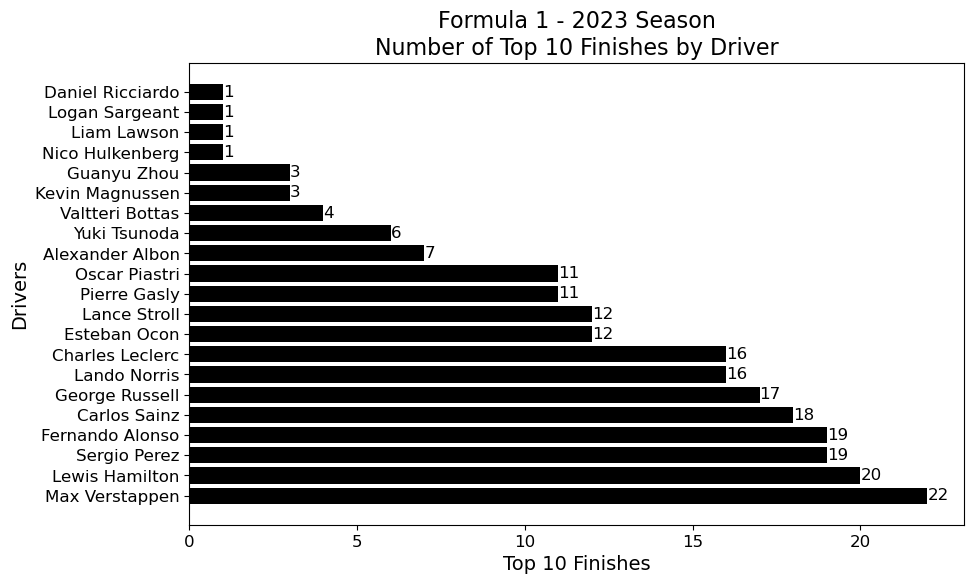

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the race result data for the 2023 season
race_result = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_raceResults.csv')

# Check the first few rows of the race results
print("First few rows of the race results:")
print(race_result.head())

# Convert the Position column to numeric, coercing errors to NaN
race_result['Position'] = pd.to_numeric(race_result['Position'], errors='coerce')

# Filter for top 10 finishes (where Position is 1 to 10) and count
top_10_finishers = race_result[race_result['Position'].between(1, 10)]['Driver'].value_counts()

# Create the plot only if there are top 10 finishes
if not top_10_finishers.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_finishers.index, top_10_finishers, color='black')
    plt.xlabel('Top 10 Finishes', fontsize=14)
    plt.ylabel('Drivers', fontsize=14)
    plt.title('Formula 1 - 2023 Season\nNumber of Top 10 Finishes by Driver', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate the bars with the top 10 counts
    for index, value in enumerate(top_10_finishers):
        plt.text(value, index, str(value), fontsize=12, va='center')

    # Show the plot
    plt.show()
else:
    print("No top 10 finishes found.")


First few rows of the qualifying results:
     Track Position  No           Driver                          Team  \
0  Bahrain        1   1   Max Verstappen    Red Bull Racing Honda RBPT   
1  Bahrain        2  11     Sergio Perez    Red Bull Racing Honda RBPT   
2  Bahrain        3  16  Charles Leclerc                       Ferrari   
3  Bahrain        4  55     Carlos Sainz                       Ferrari   
4  Bahrain        5  14  Fernando Alonso  Aston Martin Aramco Mercedes   

         Q1        Q2        Q3  Laps  
0  1:31.295  1:30.503  1:29.708    15  
1  1:31.479  1:30.746  1:29.846    15  
2  1:31.094  1:30.282  1:30.000    17  
3  1:30.993  1:30.515  1:30.154    18  
4  1:31.158  1:30.645  1:30.336    15  


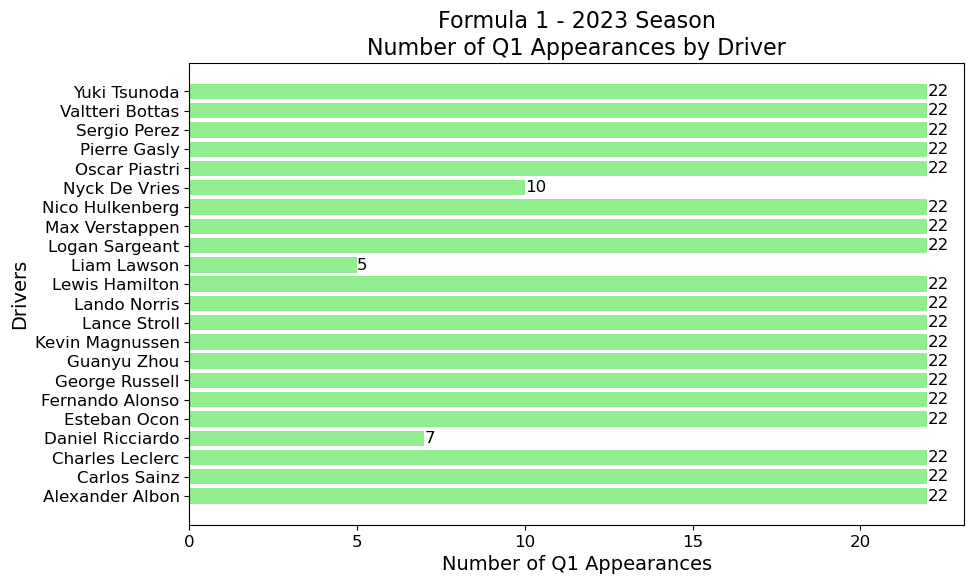

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the qualifying results data for the 2023 season
qualifying_results = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_qualifyingResults.csv')

# Check the first few rows of the qualifying results
print("First few rows of the qualifying results:")
print(qualifying_results.head())

# Count the number of appearances in Q1 for each driver
q1_appearances = qualifying_results[qualifying_results['Q1'].notna()].groupby('Driver').size().reset_index(name='Q1 Appearances')

# Create the plot only if there are appearances
if not q1_appearances.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(q1_appearances['Driver'], q1_appearances['Q1 Appearances'], color='lightgreen')
    plt.xlabel('Number of Q1 Appearances', fontsize=14)
    plt.ylabel('Drivers', fontsize=14)
    plt.title('Formula 1 - 2023 Season\nNumber of Q1 Appearances by Driver', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate the bars with the Q1 appearances
    for index, value in enumerate(q1_appearances['Q1 Appearances']):
        plt.text(value, index, str(value), fontsize=12, va='center')

    # Show the plot
    plt.show()
else:
    print("No Q1 appearances found.")


First few rows of the qualifying results:
     Track Position  No           Driver                          Team  \
0  Bahrain        1   1   Max Verstappen    Red Bull Racing Honda RBPT   
1  Bahrain        2  11     Sergio Perez    Red Bull Racing Honda RBPT   
2  Bahrain        3  16  Charles Leclerc                       Ferrari   
3  Bahrain        4  55     Carlos Sainz                       Ferrari   
4  Bahrain        5  14  Fernando Alonso  Aston Martin Aramco Mercedes   

         Q1        Q2        Q3  Laps  
0  1:31.295  1:30.503  1:29.708    15  
1  1:31.479  1:30.746  1:29.846    15  
2  1:31.094  1:30.282  1:30.000    17  
3  1:30.993  1:30.515  1:30.154    18  
4  1:31.158  1:30.645  1:30.336    15  


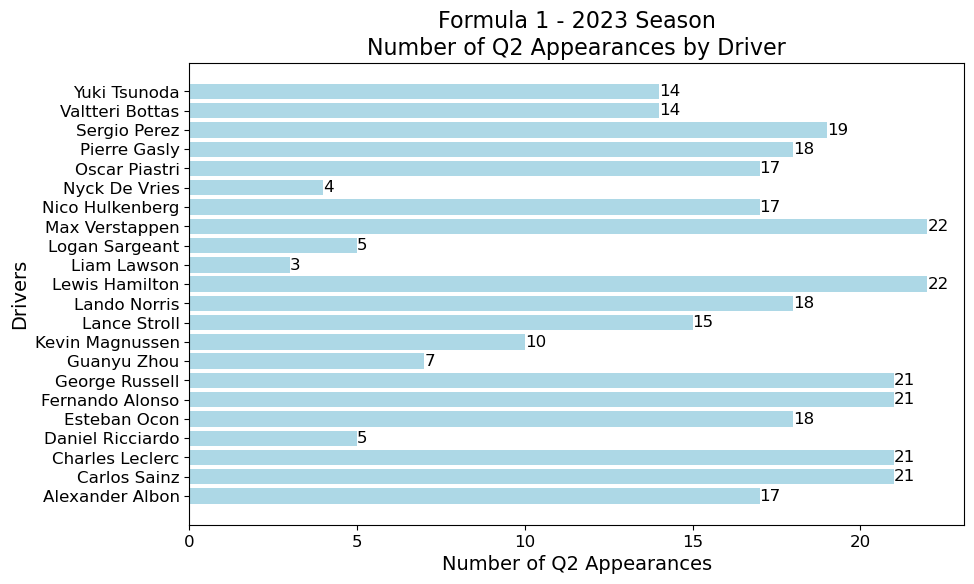

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the qualifying results data for the 2023 season
qualifying_results = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_qualifyingResults.csv')

# Check the first few rows of the qualifying results
print("First few rows of the qualifying results:")
print(qualifying_results.head())

# Count the number of appearances in Q2 for each driver
q2_appearances = qualifying_results[qualifying_results['Q2'].notna()].groupby('Driver').size().reset_index(name='Q2 Appearances')

# Create the plot only if there are appearances
if not q2_appearances.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(q2_appearances['Driver'], q2_appearances['Q2 Appearances'], color='lightblue')
    plt.xlabel('Number of Q2 Appearances', fontsize=14)
    plt.ylabel('Drivers', fontsize=14)
    plt.title('Formula 1 - 2023 Season\nNumber of Q2 Appearances by Driver', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate the bars with the Q2 appearances
    for index, value in enumerate(q2_appearances['Q2 Appearances']):
        plt.text(value, index, str(value), fontsize=12, va='center')

    # Show the plot
    plt.show()
else:
    print("No Q2 appearances found.")


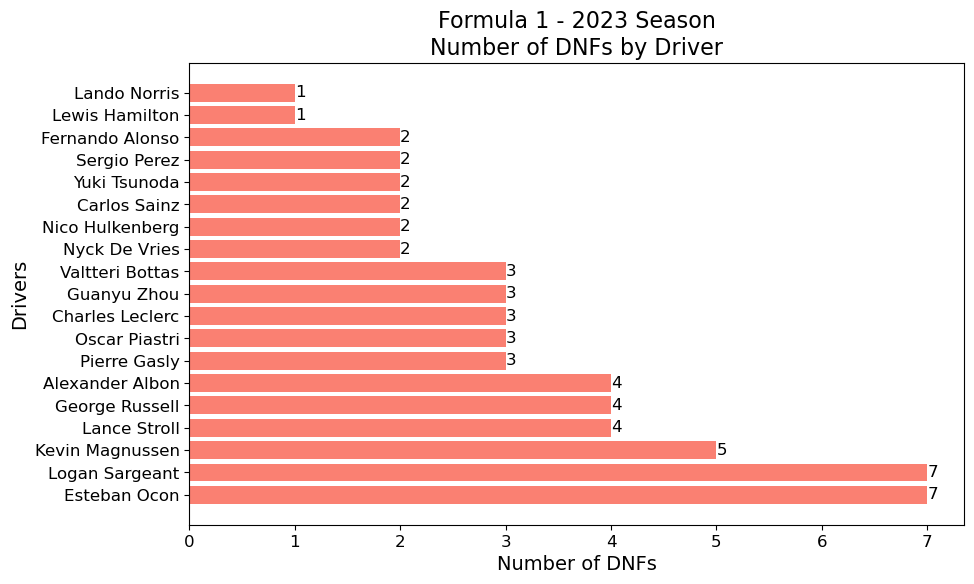

In [99]:
# Identify DNF records (update based on unique values from the previous step)
dnf_records = race_results[race_results['Time/Retired'].str.contains('Retired|DNF', na=False, case=False)]

# Count the number of DNFs for each driver
dnf_count = dnf_records['Driver'].value_counts().reset_index()
dnf_count.columns = ['Driver', 'DNF Count']

# Create the plot only if there are DNFs
if not dnf_count.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(dnf_count['Driver'], dnf_count['DNF Count'], color='salmon')
    plt.xlabel('Number of DNFs', fontsize=14)
    plt.ylabel('Drivers', fontsize=14)
    plt.title('Formula 1 - 2023 Season\nNumber of DNFs by Driver', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate the bars with the DNF counts
    for index, value in enumerate(dnf_count['DNF Count']):
        plt.text(value, index, str(value), fontsize=12, va='center')

    # Show the plot
    plt.show()



First few rows of the race results:
     Track Position  No           Driver                          Team  \
0  Bahrain        1   1   Max Verstappen    Red Bull Racing Honda RBPT   
1  Bahrain        2  11     Sergio Perez    Red Bull Racing Honda RBPT   
2  Bahrain        3  14  Fernando Alonso  Aston Martin Aramco Mercedes   
3  Bahrain        4  55     Carlos Sainz                       Ferrari   
4  Bahrain        5  44   Lewis Hamilton                      Mercedes   

   Starting Grid  Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
0              1    57  1:33:56.736      25              No         1:36.236  
1              2    57      +11.987      18              No         1:36.344  
2              5    57      +38.637      15              No         1:36.156  
3              4    57      +48.052      12              No         1:37.130  
4              7    57      +50.977      10              No         1:36.546  


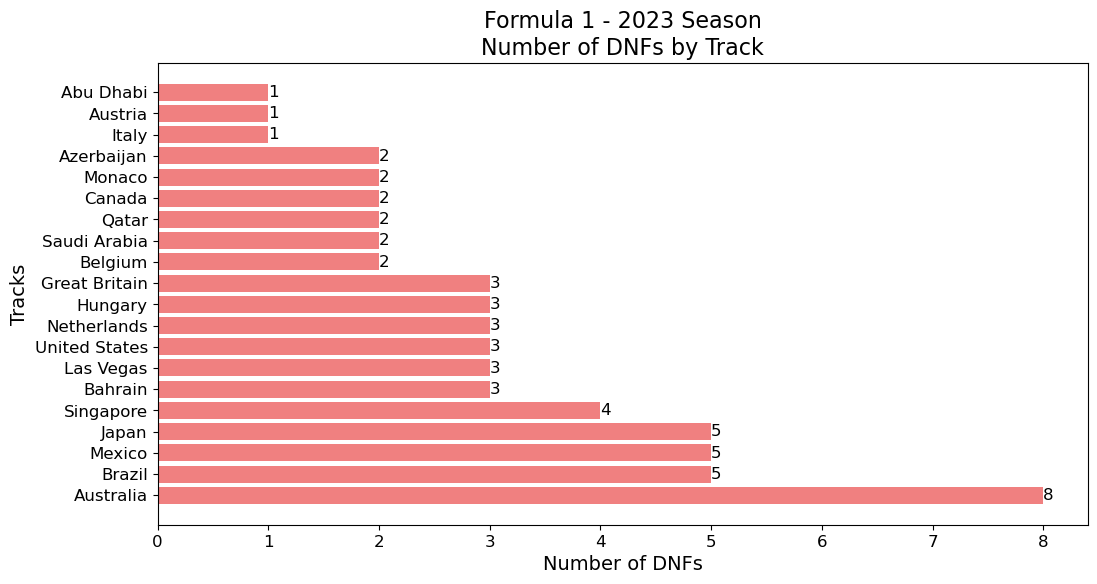

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the race results data for the 2023 season
race_results = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_raceResults.csv')

# Check the first few rows of the race results
print("First few rows of the race results:")
print(race_results.head())

# Identify DNF records (update based on how DNF is recorded)
dnf_records = race_results[race_results['Time/Retired'].str.contains('Retired|DNF', na=False, case=False)]

# Group by Track and count DNFs
dnf_by_track = dnf_records['Track'].value_counts().reset_index()
dnf_by_track.columns = ['Track', 'DNF Count']

# Create the plot only if there are DNFs
if not dnf_by_track.empty:
    plt.figure(figsize=(12, 6))
    plt.barh(dnf_by_track['Track'], dnf_by_track['DNF Count'], color='lightcoral')
    plt.xlabel('Number of DNFs', fontsize=14)
    plt.ylabel('Tracks', fontsize=14)
    plt.title('Formula 1 - 2023 Season\nNumber of DNFs by Track', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate the bars with the DNF counts
    for index, value in enumerate(dnf_by_track['DNF Count']):
        plt.text(value, index, str(value), fontsize=12, va='center')

    # Show the plot
    plt.show()



First few rows of the Driver of the Day data:
          Track        1st Place  1st Place(%)        2nd Place  2nd Place(%)  \
0       Bahrain  Fernando Alonso          53.3     Pierre Gasly           6.5   
1  Saudi Arabia   Max Verstappen          26.3     Sergio Perez          19.8   
2     Australia     Sergio Perez          21.3   Lewis Hamilton          14.3   
3    Azerbaijan     Sergio Perez          29.1  Fernando Alonso          14.3   
4         Miami   Max Verstappen          27.1     Sergio Perez          12.5   

         3rd Place  3rd Place(%)        4th Place  4th Place(%)  \
0   Max Verstappen           6.3   Lewis Hamilton           5.5   
1  Fernando Alonso          14.6  Charles Leclerc           7.2   
2     Pierre Gasly          10.3     Lando Norris           9.6   
3  Charles Leclerc          11.4   Lewis Hamilton           9.1   
4  Fernando Alonso           9.8   Lewis Hamilton           8.6   

         5th Place  5th Place(%)  
0  Charles Leclerc           

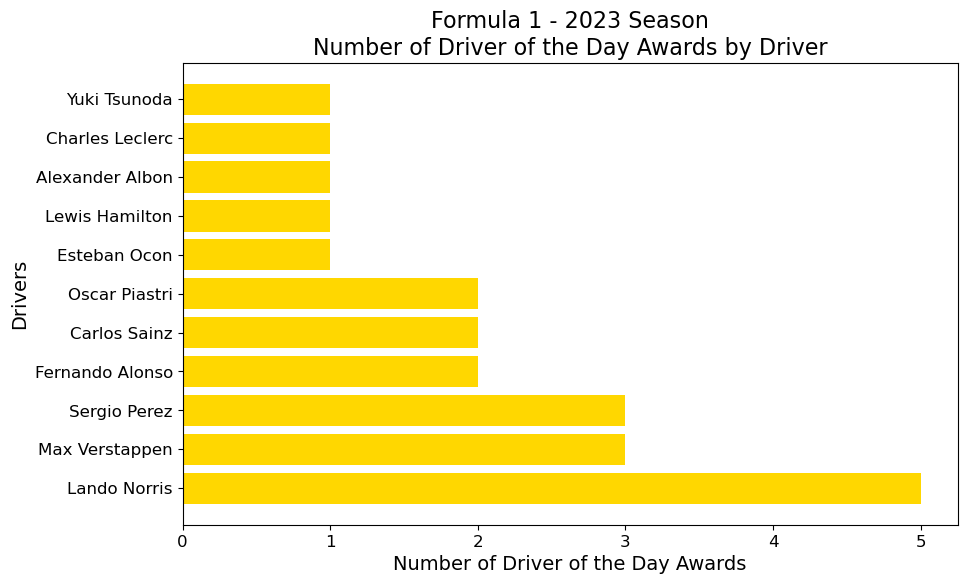

In [127]:




# Check the first few rows of the data
print("First few rows of the Driver of the Day data:")
print(driver_of_the_day.head())

# Count the number of Driver of the Day votes for each driver
dod_counts = driver_of_the_day['1st Place'].value_counts().reset_index()
dod_counts.columns = ['Driver', 'Driver of the Day Count']

# Sort in descending order (most to least)
dod_counts = dod_counts.sort_values(by='Driver of the Day Count', ascending=False)

# Create the plot only if there are votes
if not dod_counts.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(dod_counts['Driver'], dod_counts['Driver of the Day Count'], color='gold')
    plt.xlabel('Number of Driver of the Day Awards', fontsize=14)
    plt.ylabel('Drivers', fontsize=14)
    plt.title('Formula 1 - 2023 Season\nNumber of Driver of the Day Awards by Driver', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate the bars with the DOD counts
  

    # Show the plot
    plt.show()
else:
    print("No Driver of the Day awards found.")



Lando Norris, a British Formula 1 driver for McLaren, reached a significant career milestone by accumulating 250 points in the 2023 season. Since his debut in 2019, he has consistently showcased his talent, achieving multiple podium finishes and solid performances that reflect his growth and competitiveness in the sport. This points tally highlights his potential as a future championship contender and underscores his importance to the McLaren team, making him one of the most promising drivers in Formula 1 today.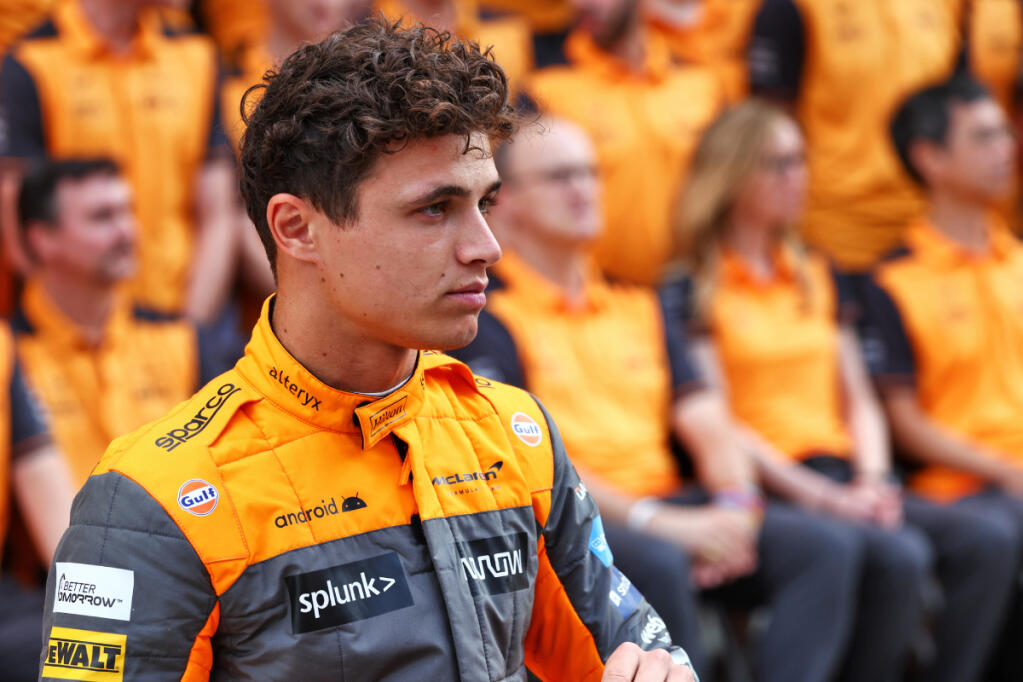


First few rows of the Driver of the Day data:
          Track        1st Place  1st Place(%)        2nd Place  2nd Place(%)  \
0       Bahrain  Fernando Alonso          53.3     Pierre Gasly           6.5   
1  Saudi Arabia   Max Verstappen          26.3     Sergio Perez          19.8   
2     Australia     Sergio Perez          21.3   Lewis Hamilton          14.3   
3    Azerbaijan     Sergio Perez          29.1  Fernando Alonso          14.3   
4         Miami   Max Verstappen          27.1     Sergio Perez          12.5   

         3rd Place  3rd Place(%)        4th Place  4th Place(%)  \
0   Max Verstappen           6.3   Lewis Hamilton           5.5   
1  Fernando Alonso          14.6  Charles Leclerc           7.2   
2     Pierre Gasly          10.3     Lando Norris           9.6   
3  Charles Leclerc          11.4   Lewis Hamilton           9.1   
4  Fernando Alonso           9.8   Lewis Hamilton           8.6   

         5th Place  5th Place(%)  
0  Charles Leclerc           

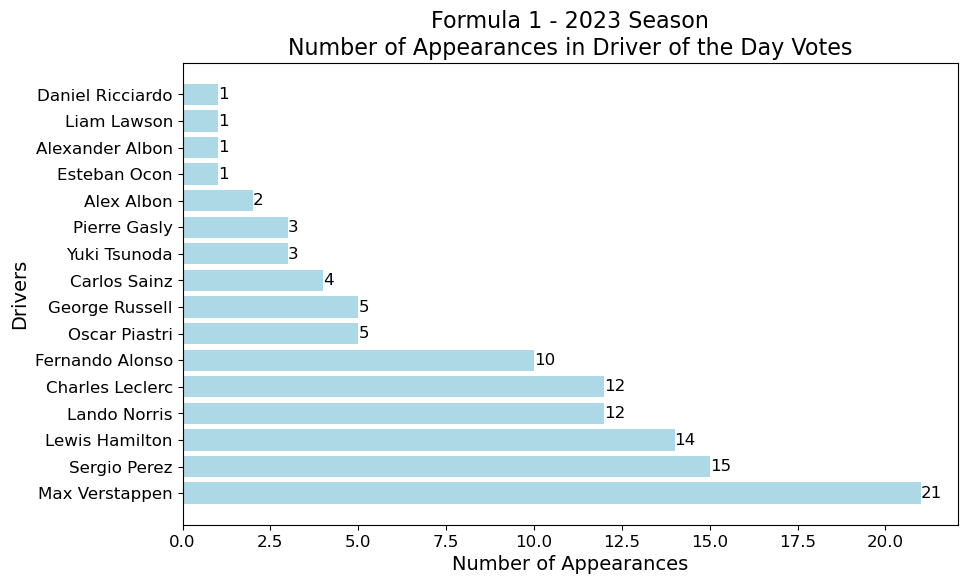

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Driver of the Day data for the 2023 season
driver_of_the_day = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_driverOfTheDayVotes.csv')

# Check the first few rows of the data
print("First few rows of the Driver of the Day data:")
print(driver_of_the_day.head())

# Count the appearances of each driver in the votes
# Assuming '1st Place', '2nd Place', etc., columns represent the voted drivers
dod_columns = ['1st Place', '2nd Place', '3rd Place', '4th Place', '5th Place']

# Melt the DataFrame to count appearances
dod_melted = driver_of_the_day.melt(value_vars=dod_columns, value_name='Driver')

# Count the number of appearances for each driver
appearance_counts = dod_melted['Driver'].value_counts().reset_index()
appearance_counts.columns = ['Driver', 'Appearance Count']

# Sort in descending order (most to least)
appearance_counts = appearance_counts.sort_values(by='Appearance Count', ascending=False)

# Create the plot only if there are appearances
if not appearance_counts.empty:
    plt.figure(figsize=(10, 6))
    plt.barh(appearance_counts['Driver'], appearance_counts['Appearance Count'], color='lightblue')
    plt.xlabel('Number of Appearances', fontsize=14)
    plt.ylabel('Drivers', fontsize=14)
    plt.title('Formula 1 - 2023 Season\nNumber of Appearances in Driver of the Day Votes', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Annotate the bars with the appearance counts
    for index, value in enumerate(appearance_counts['Appearance Count']):
        plt.text(value, index, str(value), fontsize=12, va='center')

    # Show the plot
    plt.show()
else:
    print("No appearances found.")


Unique Tracks in Race Results:
['Bahrain' 'Saudi Arabia' 'Australia' 'Azerbaijan' 'Miami' 'Monaco'
 'Spain' 'Canada' 'Austria' 'Great Britain' 'Hungary' 'Belgium'
 'Netherlands' 'Italy' 'Singapore' 'Japan' 'Qatar' 'United States'
 'Mexico' 'Brazil' 'Las Vegas' 'Abu Dhabi']

Unique GP Names in Season Calendar:
['Gulf Air Bahrain GP' 'STC Saudi Arabian GP' 'Rolex Australian GP'
 'Azerbaijan GP' 'Crypto.com Miami GP'
 "Qatar Airways Gran Premio Del Made In Italy e Dell'Emilia-Romagna"
 'Grand Prix de Monaco' 'AWS Gran Premio de España'
 'Pirelli Grand Prix du Canada' 'Rolex Grosser Preis Von Österreich'
 'Aramco British GP' 'Qatar Airways Hungarian GP' 'MSC Cruises Belgian GP'
 'Heineken Dutch GP' "Pirelli Gran Premio D'Italia"
 'Singapore Airlines Singapore GP' 'Lenovo Japanese GP'
 'Qatar Airways Qatar GP' 'Lenovo United States GP'
 'Gran Premio de la Ciudad de México' 'Rolex Grande Prêmio de São Paulo'
 'Heineken Silver Las Vegas GP' 'Etihad Airways Abu Dhabi GP']
Merged DataFrame Shap

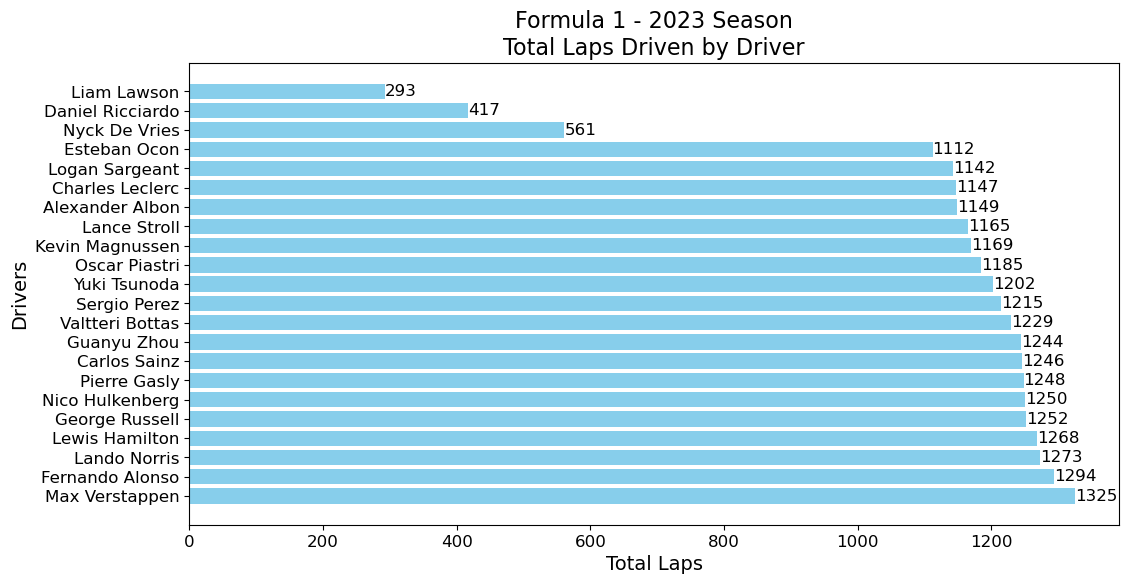

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the race results and season calendar data
race_results = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_raceResults.csv')
season_calendar = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_calendar.csv')

# Check unique tracks
print("Unique Tracks in Race Results:")
print(race_results['Track'].unique())

print("\nUnique GP Names in Season Calendar:")
print(season_calendar['GP Name'].unique())

# Merge the race results with the season calendar
merged_data = pd.merge(race_results, season_calendar[['GP Name', 'Number of Laps', 'Circuit Length(km)']], 
                        left_on='Track', right_on='GP Name', how='left')

# Check the shape and first few rows of the merged DataFrame
print(f"Merged DataFrame Shape: {merged_data.shape}")
print(merged_data.head())

# Calculate total distance driven for each driver
merged_data['Distance Driven (km)'] = merged_data['Laps'] * merged_data['Circuit Length(km)']

# Group by driver to get total laps and distance driven
driver_summary = merged_data.groupby('Driver').agg({'Laps': 'sum', 'Distance Driven (km)': 'sum'}).reset_index()

# Rename columns for clarity
driver_summary.columns = ['Driver', 'Total Laps', 'Total Distance Driven (km)']

# Sort by Total Laps in descending order
driver_summary = driver_summary.sort_values(by='Total Laps', ascending=False)

# Display the summary
print("\nTotal Laps and Distance Driven by Driver:")
print(driver_summary)

# Optional: Create a bar plot for visualization
if not driver_summary.empty:
    plt.figure(figsize=(12, 6))
    plt.barh(driver_summary['Driver'], driver_summary['Total Laps'], color='skyblue')
    plt.xlabel('Total Laps', fontsize=14)
    plt.ylabel('Drivers', fontsize=14)
    plt.title('Formula 1 - 2023 Season\nTotal Laps Driven by Driver', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    for index, value in enumerate(driver_summary['Total Laps']):
        plt.text(value, index, str(value), fontsize=12, va='center')

    plt.show()
else:
    print("No data available for Total Laps and Distance Driven.")



Total Laps Driven by Teams:
                           Team  Total Laps
8    Red Bull Racing Honda RBPT        2540
7                      Mercedes        2520
0            Alfa Romeo Ferrari        2473
1         AlphaTauri Honda RBPT        2473
3  Aston Martin Aramco Mercedes        2459
6              McLaren Mercedes        2458
5                  Haas Ferrari        2419
4                       Ferrari        2393
2                Alpine Renault        2360
9             Williams Mercedes        2291


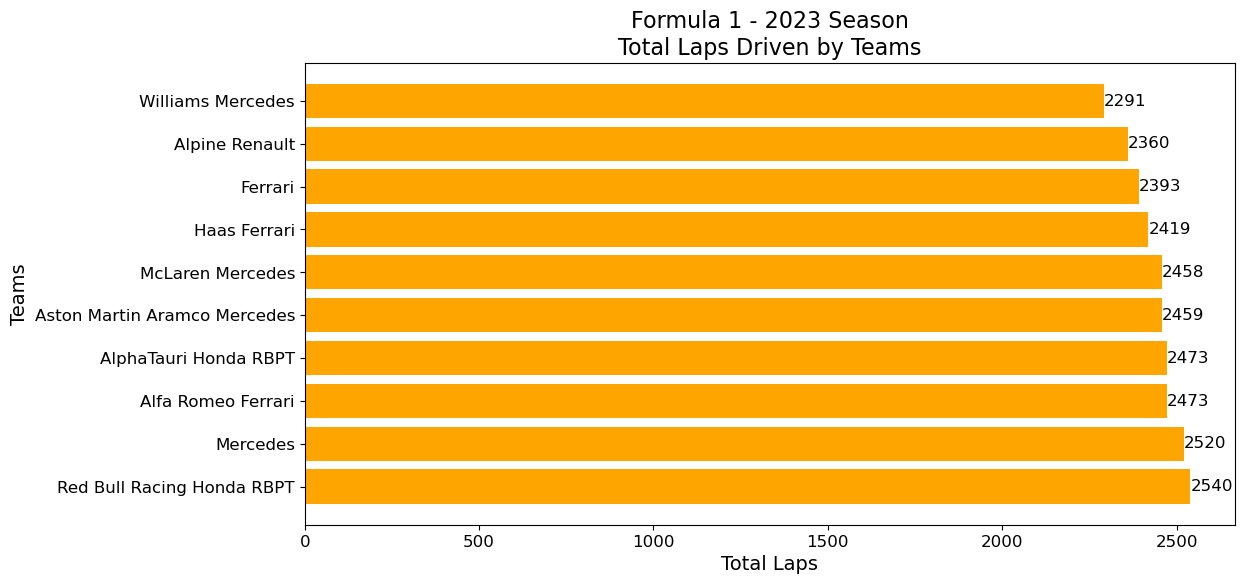

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the race results and season calendar data
race_results = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_raceResults.csv')
season_calendar = pd.read_csv(r'D:\Users\Pavas Krishnan S\formula1\Formula1_2023season_calendar.csv')

# Merge the race results with the season calendar to get circuit length
merged_data = pd.merge(race_results, season_calendar[['GP Name', 'Circuit Length(km)']], 
                        left_on='Track', right_on='GP Name', how='left')

# Group by team to get total laps driven
team_summary = merged_data.groupby('Team').agg({'Laps': 'sum'}).reset_index()

# Rename columns for clarity
team_summary.columns = ['Team', 'Total Laps']

# Sort by Total Laps in descending order
team_summary = team_summary.sort_values(by='Total Laps', ascending=False)

# Display the summary
print("\nTotal Laps Driven by Teams:")
print(team_summary)

# Optional: Create a bar plot for visualization
if not team_summary.empty:
    plt.figure(figsize=(12, 6))
    plt.barh(team_summary['Team'], team_summary['Total Laps'], color='orange')
    plt.xlabel('Total Laps', fontsize=14)
    plt.ylabel('Teams', fontsize=14)
    plt.title('Formula 1 - 2023 Season\nTotal Laps Driven by Teams', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    for index, value in enumerate(team_summary['Total Laps']):
        plt.text(value, index, str(value), fontsize=12, va='center')

    plt.show()
else:
    print("No data available for Total Laps by Teams.")


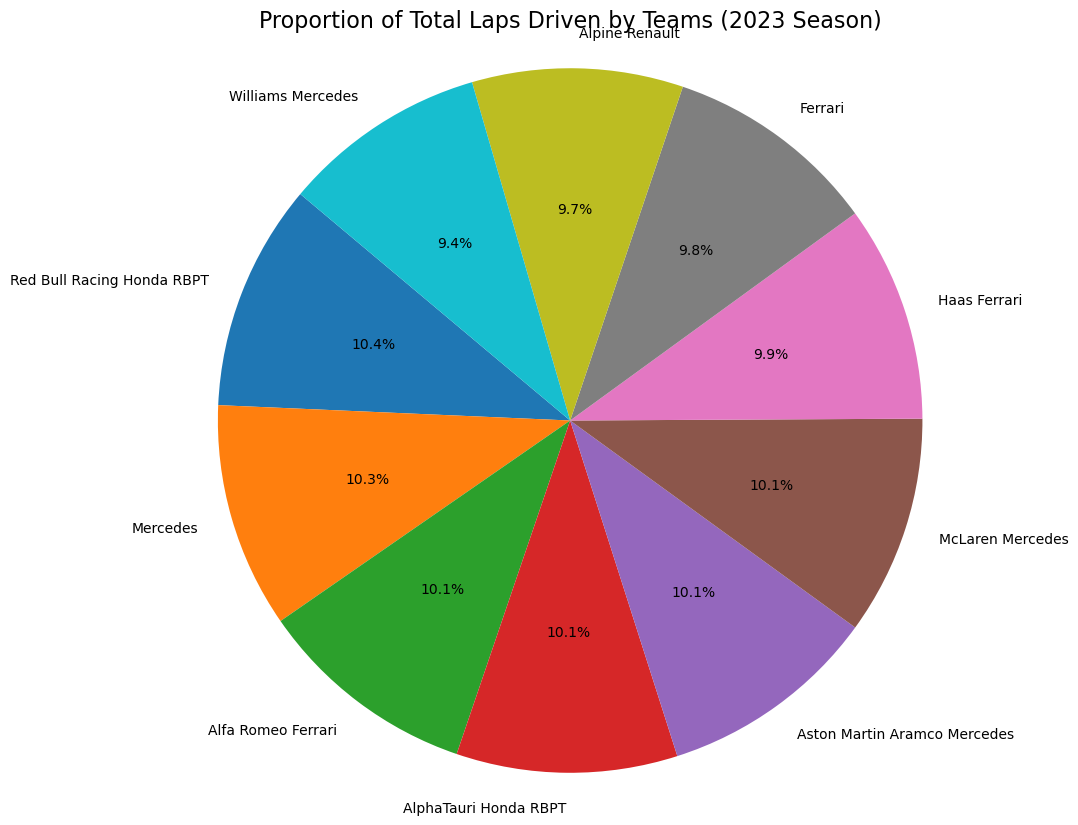

In [113]:
# Pie chart for total laps by team
plt.figure(figsize=(10, 10))
plt.pie(team_summary['Total Laps'], labels=team_summary['Team'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Laps Driven by Teams (2023 Season)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


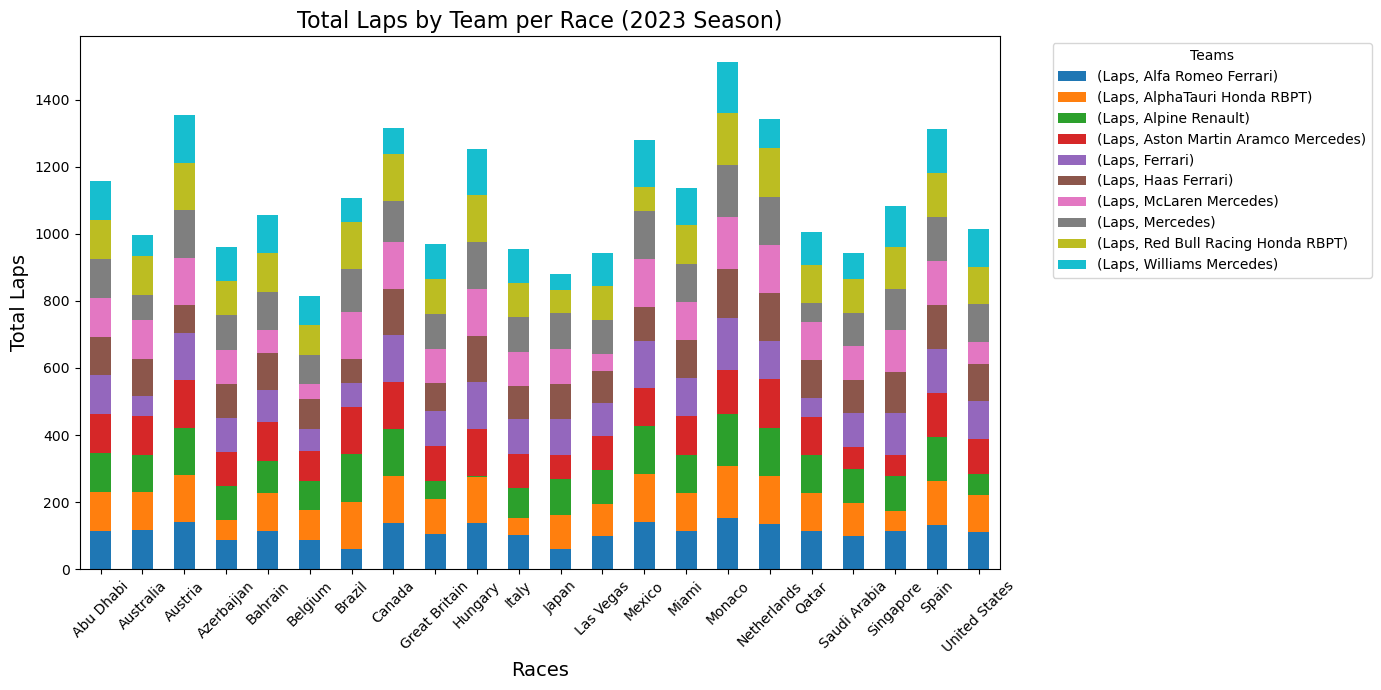

In [115]:
# Get total laps per race by team
race_team_summary = merged_data.groupby(['Track', 'Team']).agg({'Laps': 'sum'}).unstack(fill_value=0)

# Create a stacked bar chart
race_team_summary.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab10')
plt.title('Total Laps by Team per Race (2023 Season)', fontsize=16)
plt.xlabel('Races', fontsize=14)
plt.ylabel('Total Laps', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
